# **Imports:**
This section contains all necessary libraries and modules required for data loading, preprocessing, modeling, and visualization.

In [187]:
import math
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# **Data Loading**
Load the datasets.

In [188]:
# Define the file IDs from the Google Drive URLs
train_file_id = "1xJp7-q06fi7Jt6Rpfu1trdc7LiabYVvK"
test_file_id = "1Vn-z8oGMAkUF5OF9bT-Hy9hoEGFcrrab"

# Construct the direct download links
train_url = f"https://drive.google.com/uc?id={train_file_id}"
test_url = f"https://drive.google.com/uc?id={test_file_id}"

# Load train and test CSV files from Google Drive URLs
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

# Display the first few rows of each DataFrame
print("Train Data:")
print(train.head())
print("\nTest Data:")
print(test.head())

Train Data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008 

# **EDA/Data Overview:**
This section provides an initial overview of the datasets, including their shapes (number of rows and columns) and information about the columns (data types, missing values). It also displays summary statistics of numerical features, visualizes distributions and trends in the data through plots and charts.

In [189]:
# Provide an overview of the dataset shapes
# Print the number of rows and columns in the training dataset
train_rows, train_cols = train.shape
print(f"The training dataset contains {train_rows} rows and {train_cols} columns.")

# Print the number of rows and columns in the test dataset
test_rows, test_cols = test.shape
print(f"The test dataset contains {test_rows} rows and {test_cols} columns.")


The training dataset contains 1460 rows and 81 columns.
The test dataset contains 1459 rows and 80 columns.


In [190]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [191]:
test.head() #missing the SalePrice

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [192]:
# Display information about columns and memory usage in the training dataset
train_info = train.info(memory_usage='deep')
print(train_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $180,921, while median is $163,000


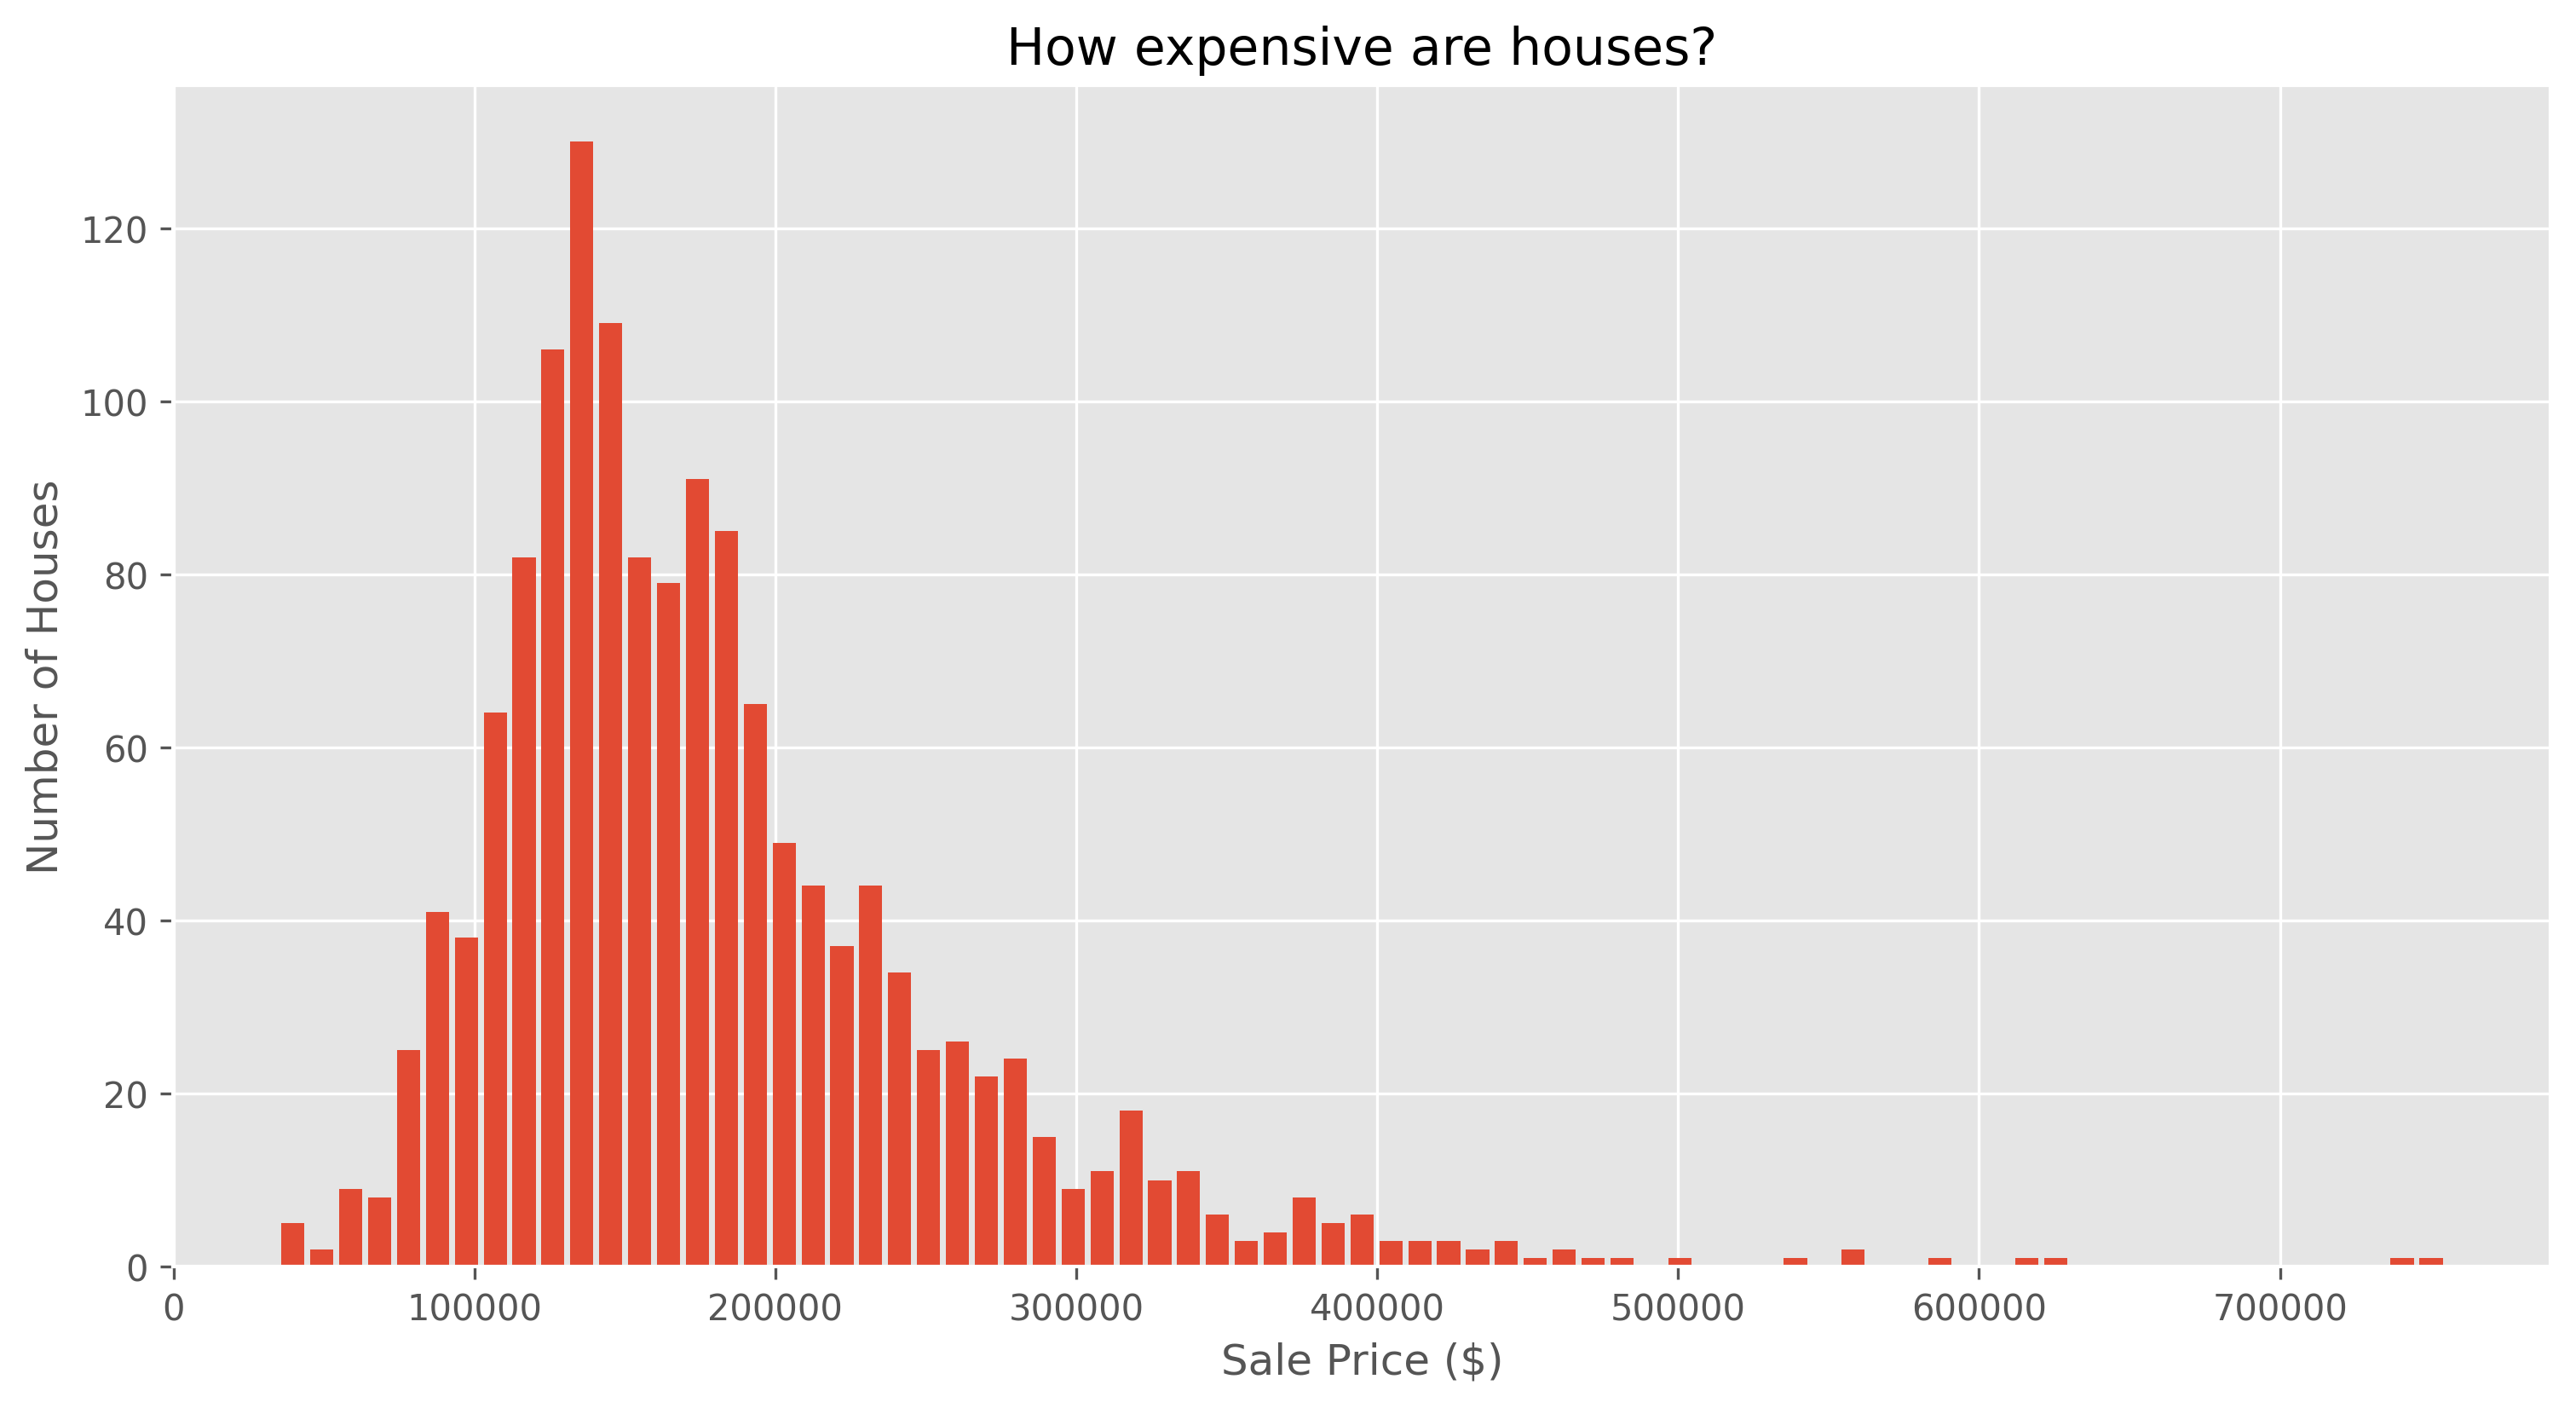

In [193]:
# Overview of house prices
min_price = train['SalePrice'].min()
max_price = train['SalePrice'].max()
avg_price = train['SalePrice'].mean()
median_price = train['SalePrice'].median()

# Display statistics
print(f"The cheapest house sold for ${min_price:,.0f} and the most expensive for ${max_price:,.0f}")
print(f"The average sales price is ${avg_price:,.0f}, while median is ${median_price:,.0f}")

plt.style.use('ggplot')

# Plot your histogram
plt.figure(figsize=(12, 6), dpi=300)
train['SalePrice'].hist(bins=75, rwidth=0.8)
plt.title('How expensive are houses?')
plt.xlabel('Sale Price ($)')
plt.ylabel('Number of Houses')

# Save the plot
plt.show()
plt.savefig('SalePrice.png', bbox_inches='tight', dpi=300)
plt.close()


The oldest house was built in 1872. The newest house was built in 2010.


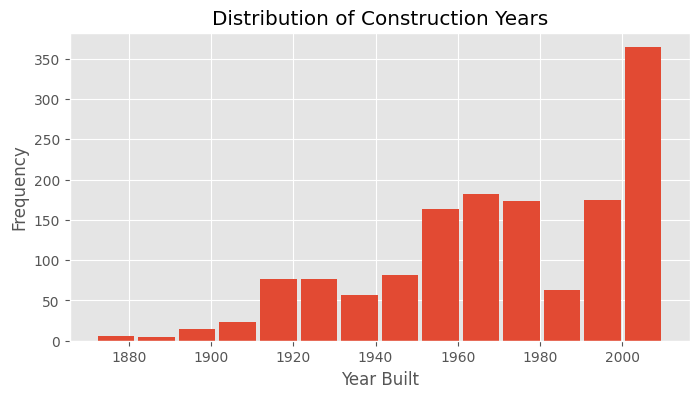

<Figure size 640x480 with 0 Axes>

In [194]:
# Provide information about the construction years of the houses
oldest_year = train['YearBuilt'].min()
newest_year = train['YearBuilt'].max()
print(f"The oldest house was built in {oldest_year}. The newest house was built in {newest_year}.")

# Visualize the distribution of construction years
train['YearBuilt'].hist(bins=14, rwidth=0.9, figsize=(8, 4))
plt.title('Distribution of Construction Years')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()
plt.savefig('YearBuild.png', bbox_inches='tight', dpi=300)


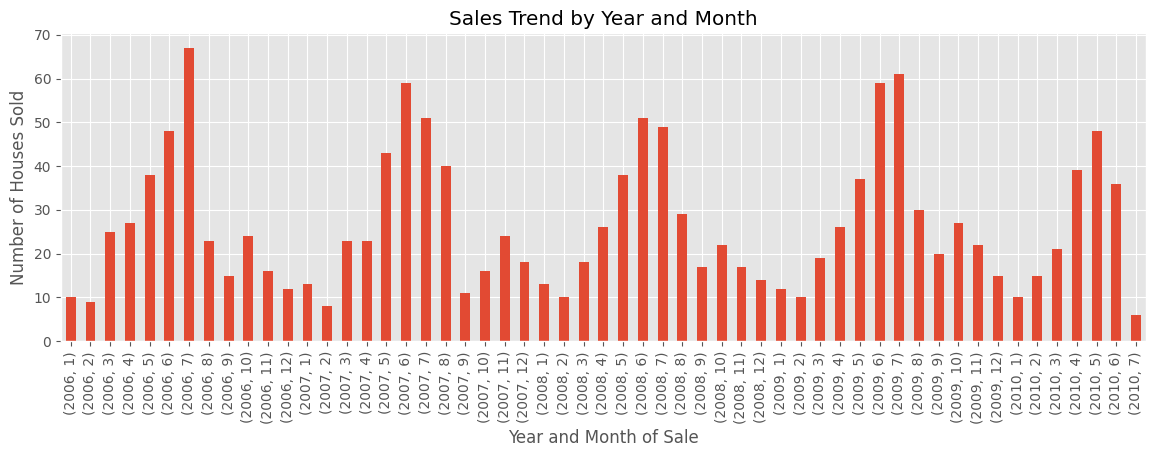

<Figure size 640x480 with 0 Axes>

In [195]:
# Analyze the sales trend by year and month
sales_by_date = train.groupby(['YrSold', 'MoSold']).Id.count()
sales_by_date.plot(kind='bar', figsize=(14, 4))
plt.title('Sales Trend by Year and Month')
plt.xlabel('Year and Month of Sale')
plt.ylabel('Number of Houses Sold')
plt.show()
plt.savefig('YearSold.png', bbox_inches='tight', dpi=300)

The average house has 1,515 sq ft of space, while the median is 1,464 sq ft
The biggest house has 5,642 sq ft of space, while the smallest has 334 sq ft


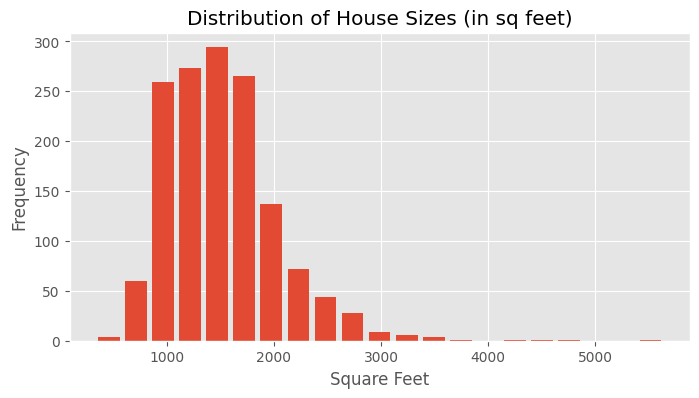

<Figure size 640x480 with 0 Axes>

In [196]:
# Analyze the size of houses in square feet
average_area = train['GrLivArea'].mean()
median_area = train['GrLivArea'].median()
print(f"The average house has {average_area:,.0f} sq ft of space, while the median is {median_area:,.0f} sq ft")

# Identify the biggest and smallest houses in terms of square footage
biggest_area = train['GrLivArea'].max()
smallest_area = train['GrLivArea'].min()
print(f"The biggest house has {biggest_area:,.0f} sq ft of space, while the smallest has {smallest_area:,.0f} sq ft")

# Visualize the distribution of house sizes
train['GrLivArea'].hist(bins=21, rwidth=0.8, figsize=(8, 4))
plt.title('Distribution of House Sizes (in sq feet)')
plt.xlabel('Square Feet')
plt.ylabel('Frequency')
plt.show()
plt.savefig('HouseSize.png', bbox_inches='tight', dpi=300)

In [197]:
def get_feature_groups(data):
    """
    Returns a list of numerical and categorical features,
    excluding SalePrice and Id.

    Parameters:
    data (DataFrame): The dataset to extract features from.

    Returns:
    tuple: A tuple containing lists of numerical and categorical features.
    """
    # Numerical Features
    num_features = data.select_dtypes(include=['int64', 'float64']).columns
    num_features = num_features.drop(['Id', 'SalePrice'])  # Drop ID and SalePrice

    # Categorical Features
    cat_features = data.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

# Extract numerical and categorical features
num_features, cat_features = get_feature_groups(train)


<ipython-input-198-55e77dd70b4c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.SalePrice)


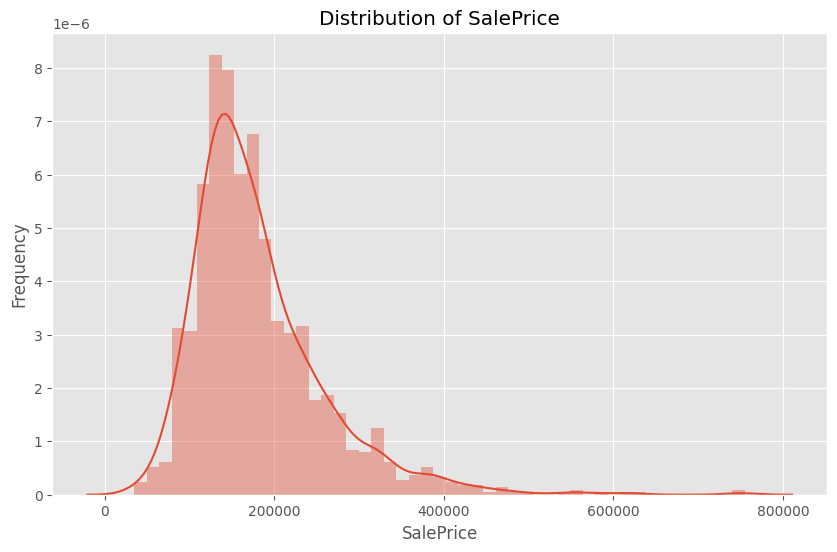

<Figure size 640x480 with 0 Axes>

In [198]:
# Visualize the distribution of the dependent variable SalePrice
plt.figure(figsize=(10, 6))
sns.distplot(train.SalePrice)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()
plt.savefig('DistofSale.png', bbox_inches='tight', dpi=300)

In [199]:
# Calculate skewness and kurtosis of SalePrice
skewness = train.SalePrice.skew()
kurtosis = train.SalePrice.kurtosis()
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(skewness, kurtosis))


Skew: 1.883 | Kurtosis: 6.536


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

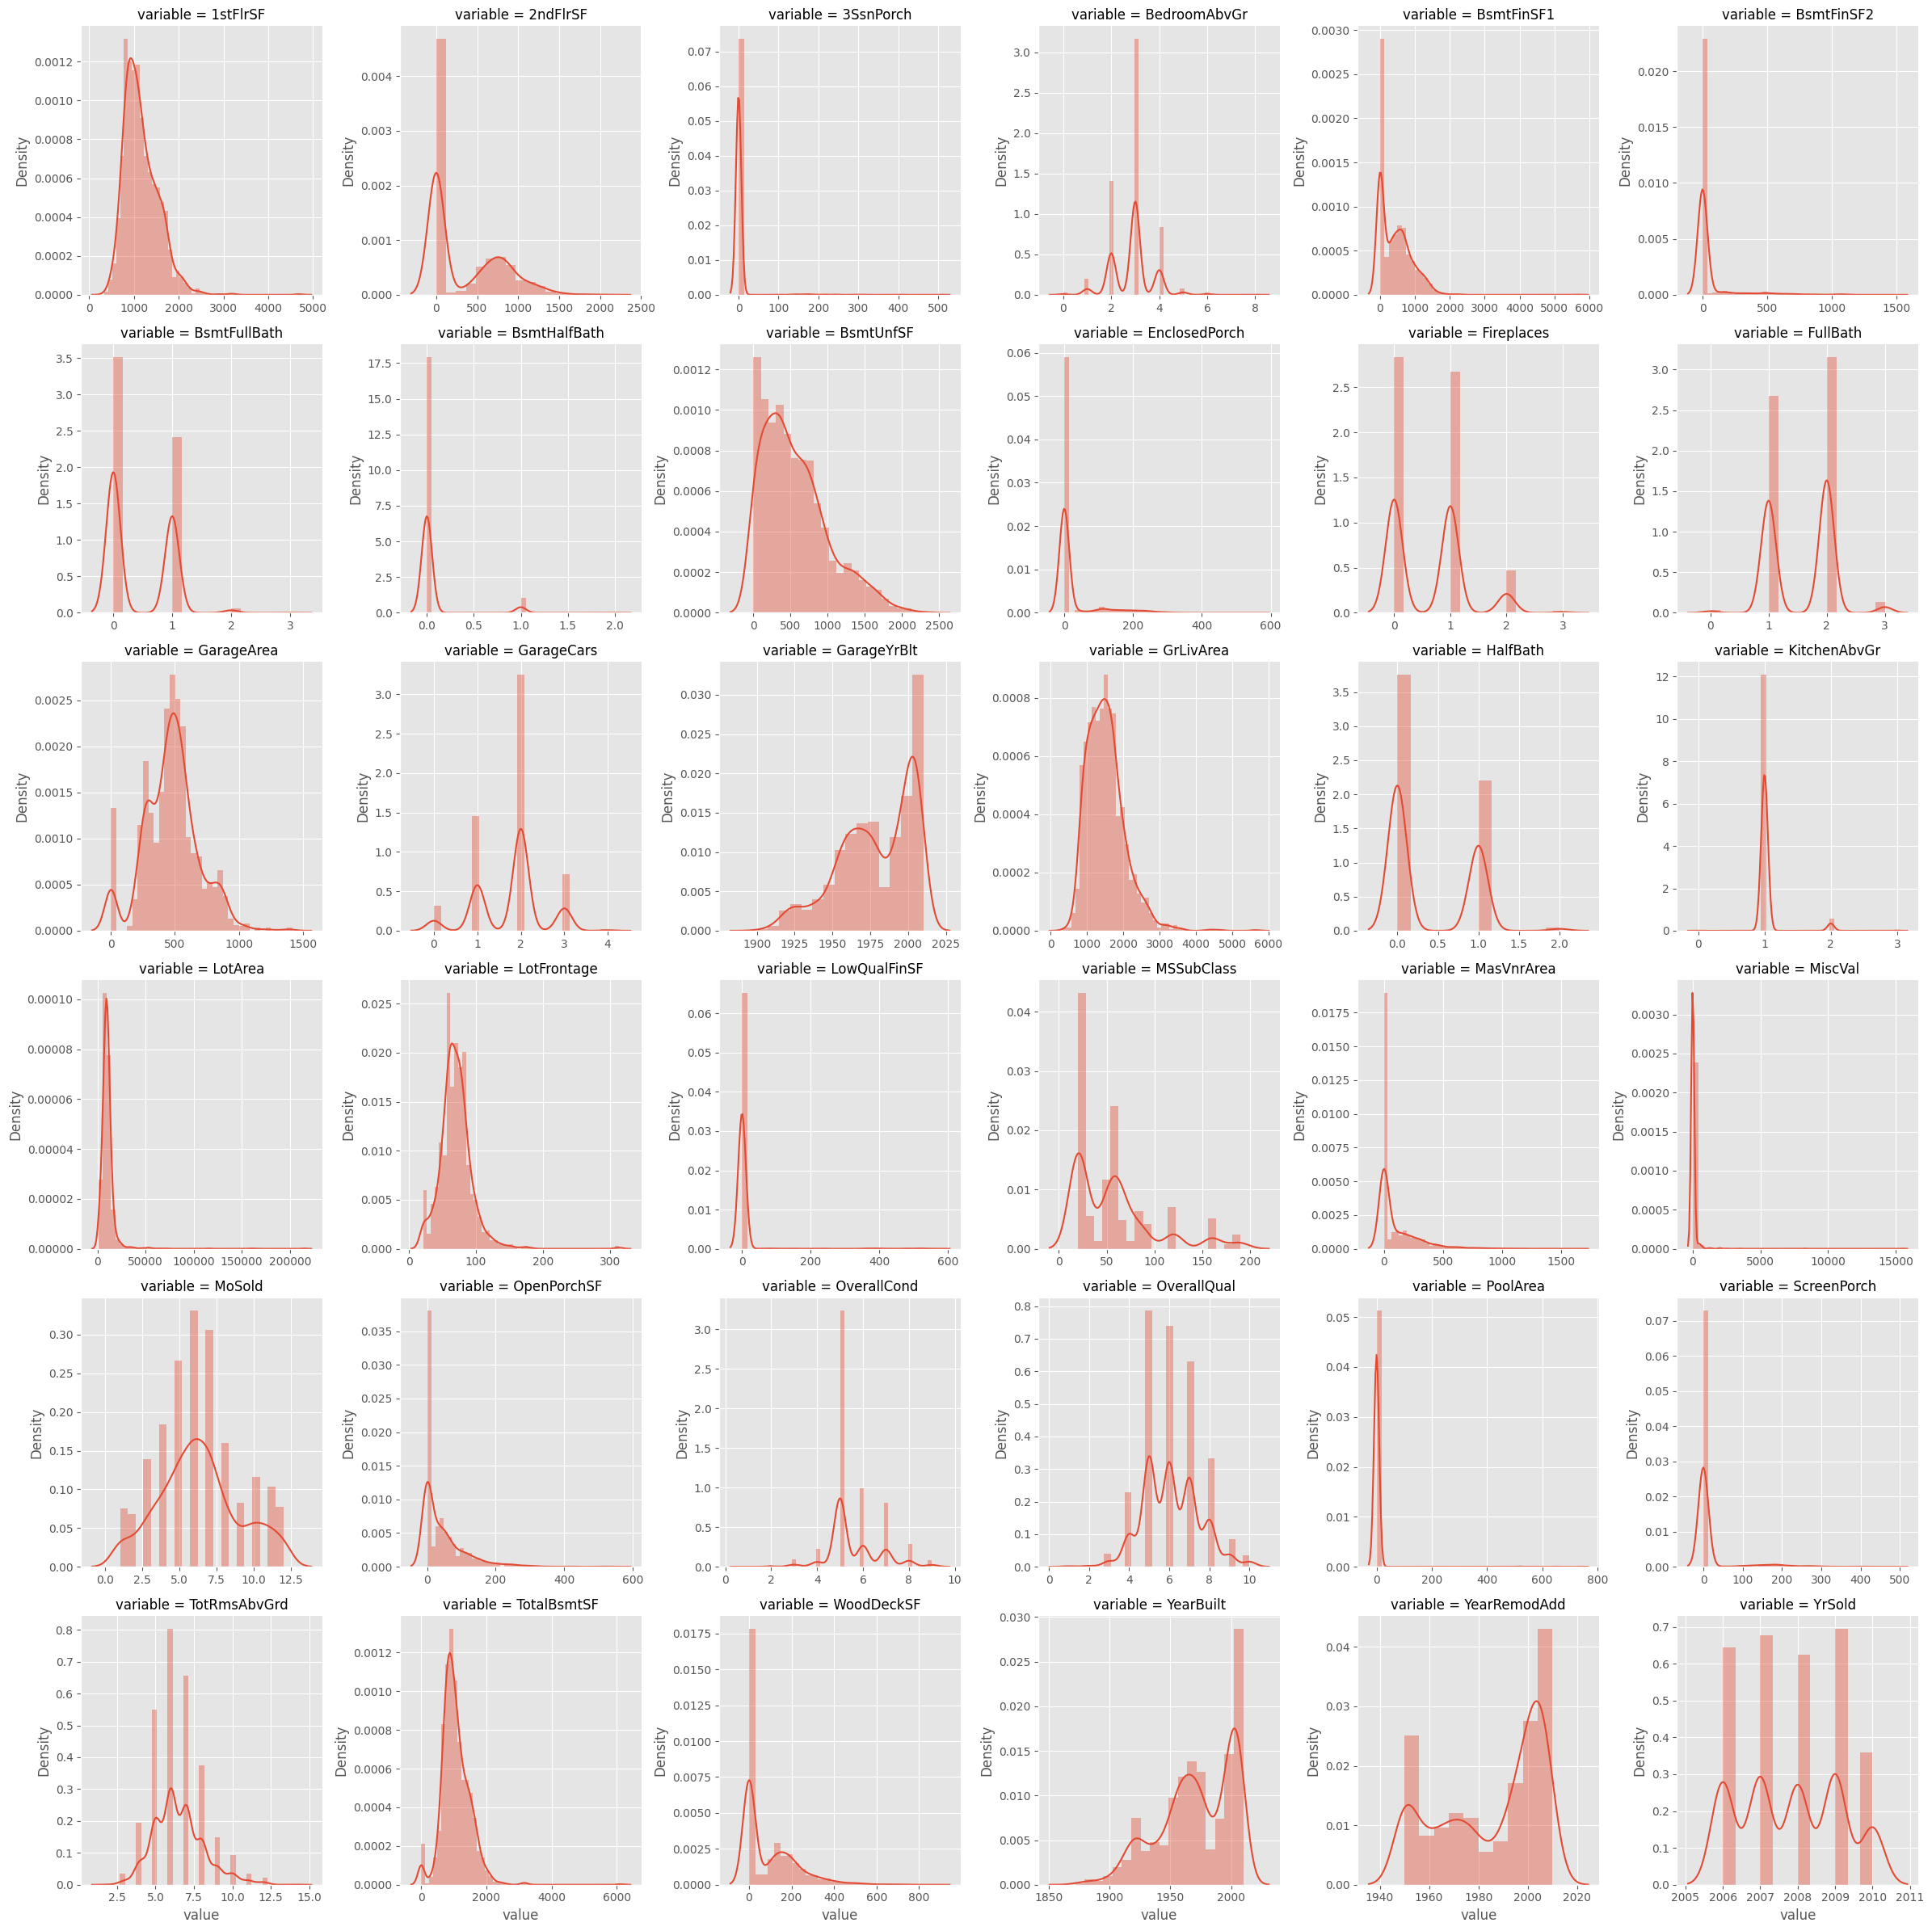

<Figure size 640x480 with 0 Axes>

In [200]:
# Create a grid of distribution plots for all numerical features
f = pd.melt(train, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=6, sharex=False, sharey=False, height=4, aspect=1)
g = g.map(sns.distplot, 'value')
plt.show()
plt.savefig('NumFeatures.png', bbox_inches='tight', dpi=300)

# **Feature Engineering:**
In this section, additional features are created from existing ones to enhance the predictive power of the model. It also involves handling missing values by removing and converting categorical features into numerical representations through one-hot encoding.

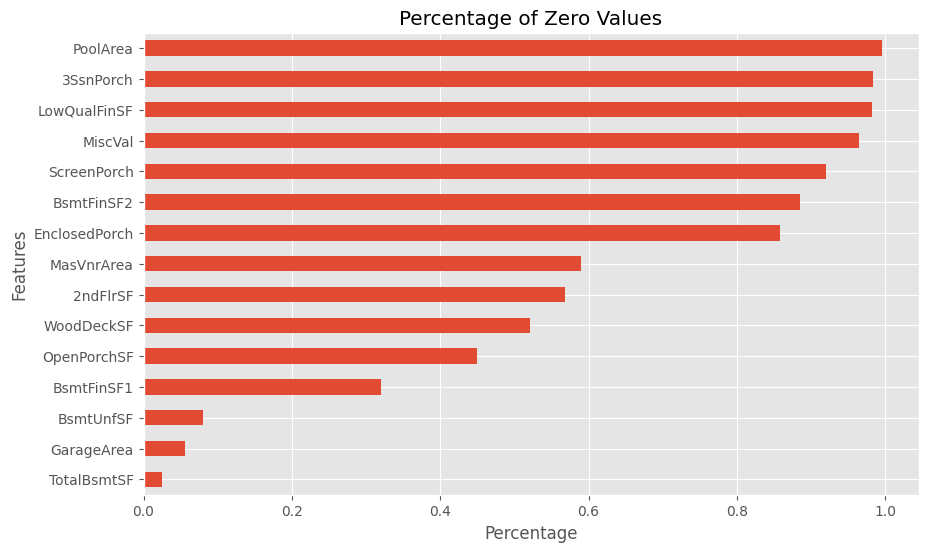

<Figure size 640x480 with 0 Axes>

In [201]:
# Calculate the percentage of zero values for certain features
count_features = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                  'KitchenAbvGr', 'TotalRmsAbvGrd', 'Fireplaces', 'GarageCars']
non_count_features = [f for f in num_features if f not in count_features]
sparse_features = (train[non_count_features] == 0).sum() / train.shape[0]

# Plot the level of sparsity
sparse_features[sparse_features > 0].sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Percentage of Zero Values')
plt.xlabel('Percentage')
plt.ylabel('Features')
plt.show()
plt.savefig('ZeroValues.png', bbox_inches='tight', dpi=300)

In [202]:
# Transform selected features to categorical
train['MSSubClass'] = train['MSSubClass'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)

# Update the list of numerical and categorical features
num_features, cat_features = get_feature_groups(train)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


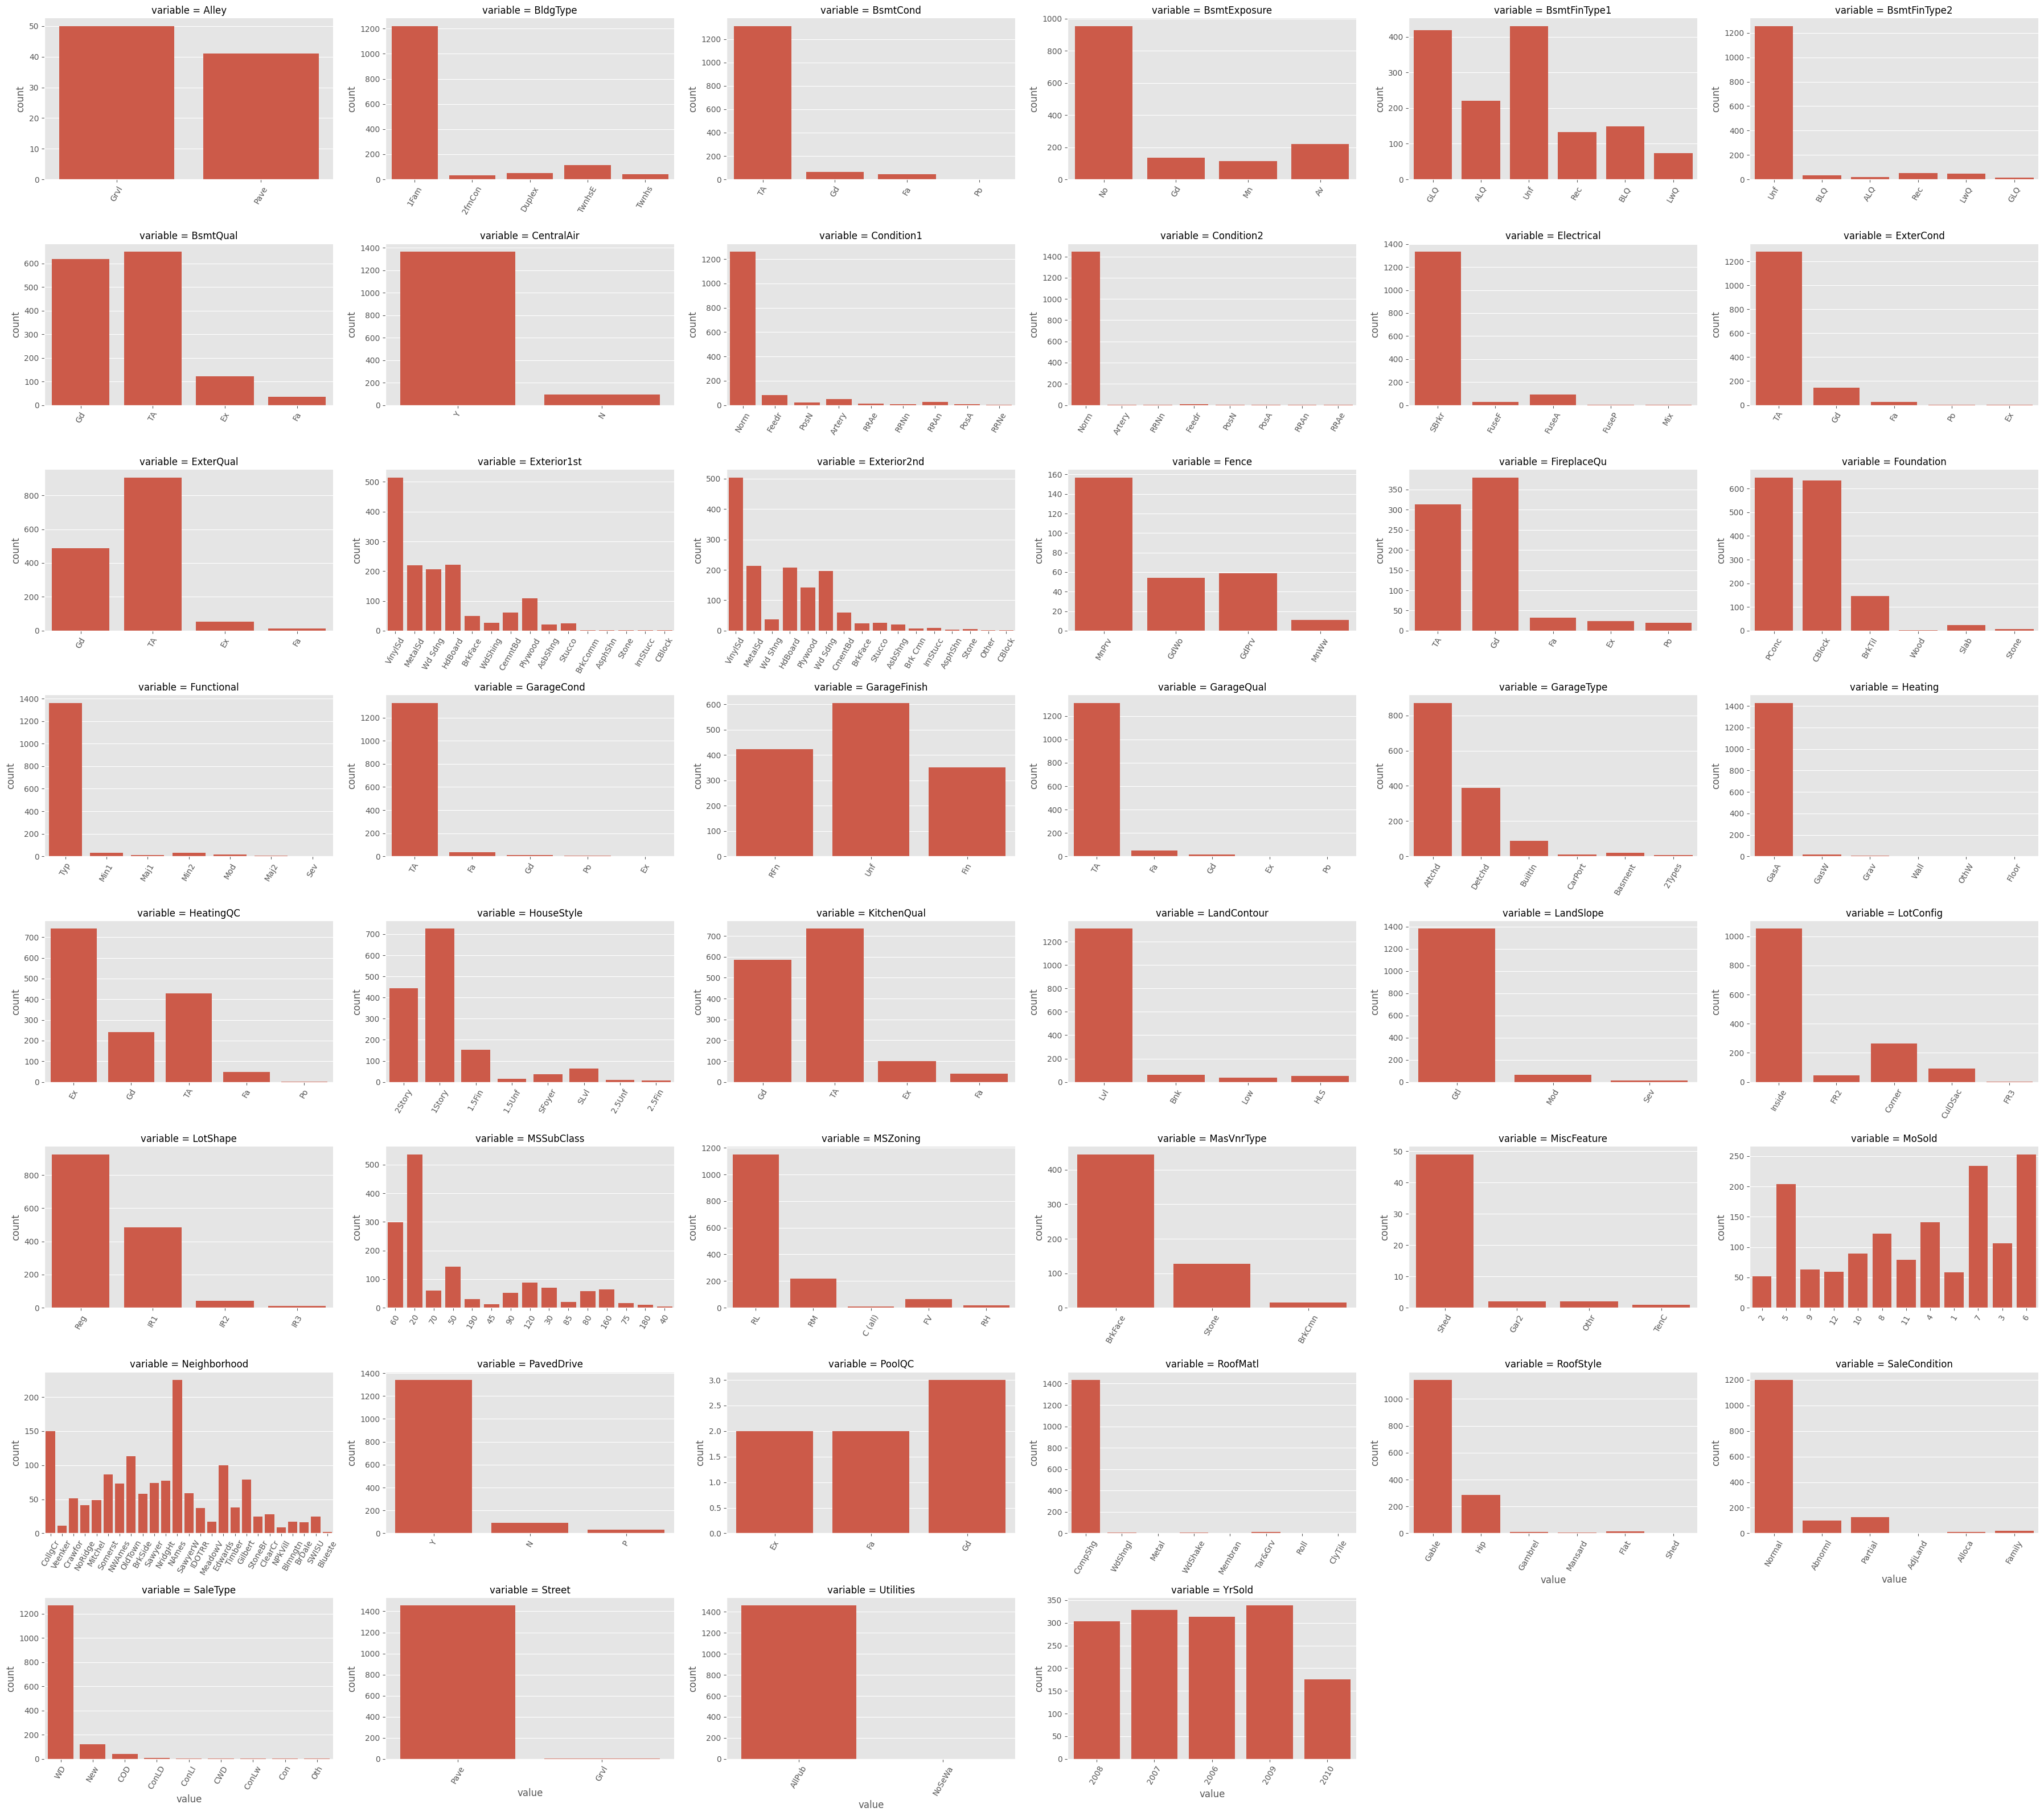

<Figure size 640x480 with 0 Axes>

In [203]:
# Create count plots for categorical features with specified plot size
f = pd.melt(train, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=6, sharex=False, sharey=False, height=4, aspect=1.5)
g = g.map(sns.countplot, 'value')
g.set_xticklabels(rotation=60)
plt.tight_layout()
plt.show()
plt.savefig('CatFeatures.png', bbox_inches='tight', dpi=300)

In [204]:

# Convert selected categorical features to numerical and replace missing values with 0

# Alley
train['Alley'].replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
train['LotShape'].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
train['LandContour'].replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
train['Utilities'].replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope
train['LandSlope'].replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
train['ExterQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
train['ExterCond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
train['BsmtQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
train['BsmtCond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
train['BsmtExposure'].replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
train['BsmtFinType1'].replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
train['BsmtFinType2'].replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
train['HeatingQC'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
train['KitchenQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
train['Functional'].replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
train['FireplaceQu'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
train['GarageFinish'].replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
train['GarageQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
train['GarageCond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
train['PavedDrive'].replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
train['PoolQC'].replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

converted_features = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']
train[converted_features] = train[converted_features].fillna(0)

# Update the list of numerical and categorical features
num_features, cat_features = get_feature_groups(train)

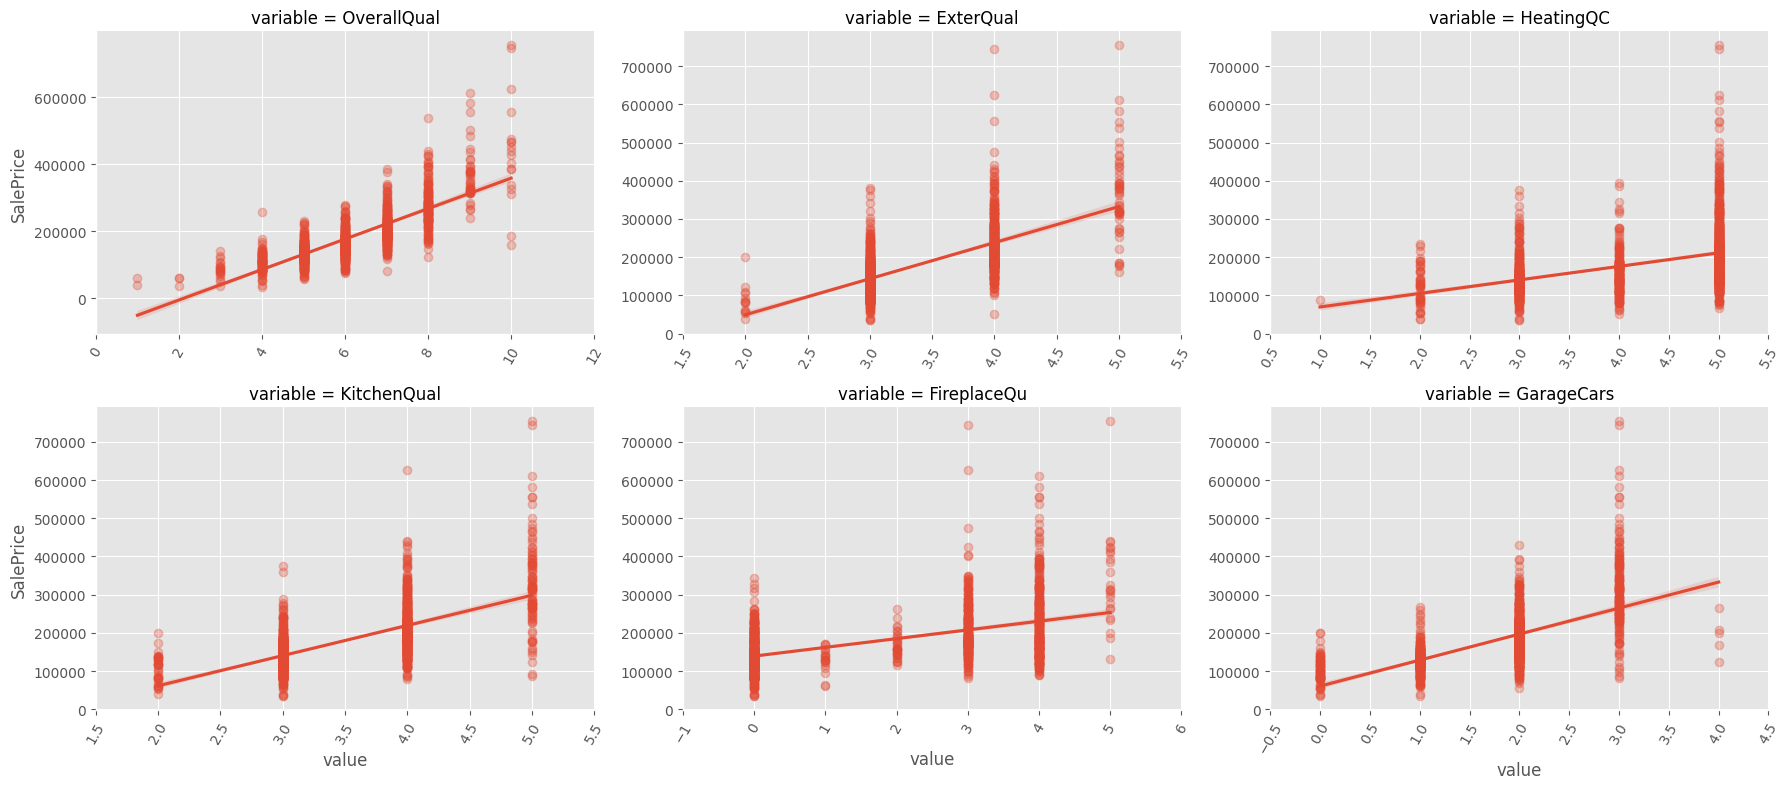

<Figure size 640x480 with 0 Axes>

In [205]:
# List of numerical features I want to include in the scatter plots
selected_features = ['OverallQual', 'GarageCars', 'HeatingQC', 'MOSold', 'KitchenQual', 'ExterQual', 'FireplaceQu']

# Filter the numerical features to include only the selected ones
selected_num_features = [feature for feature in num_features if feature in selected_features]

# Create scatter plots of selected numerical features against SalePrice
f = pd.melt(train, id_vars=['SalePrice'], value_vars=selected_num_features)
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=4, aspect=1.5)
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
g.set_xticklabels(rotation=60)
plt.tight_layout()
plt.show()
plt.savefig('NumFeatureSalePrice.png', bbox_inches='tight', dpi=300)


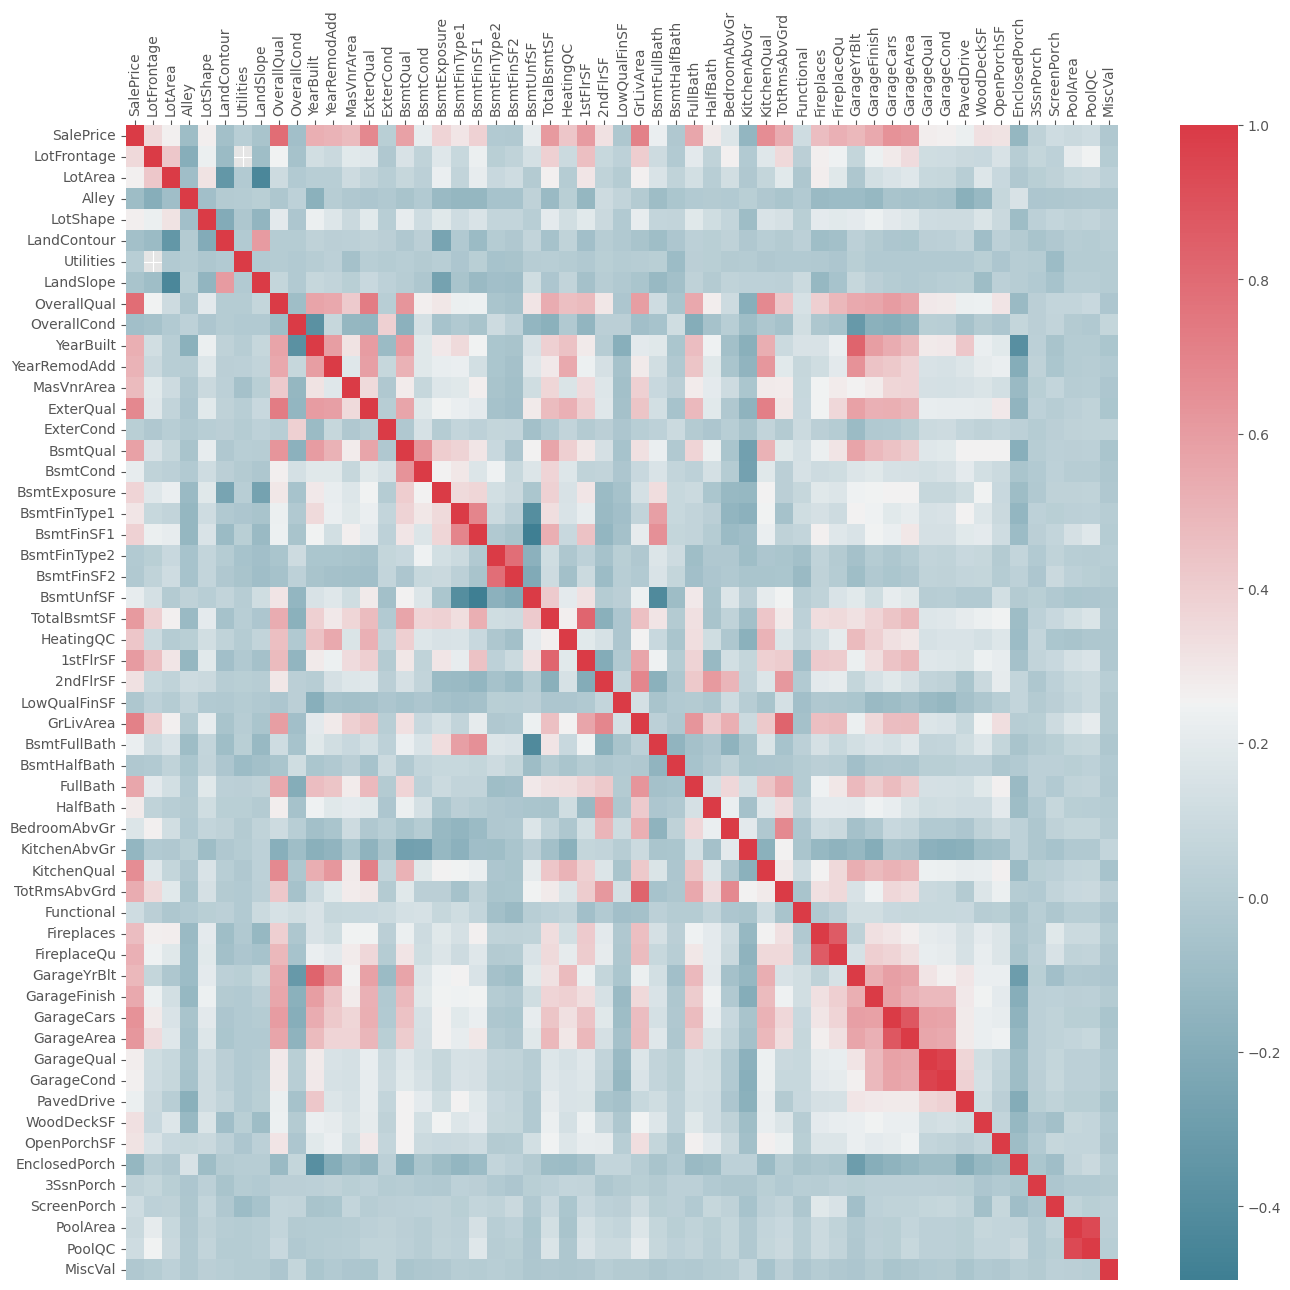

<Figure size 640x480 with 0 Axes>

In [206]:
# Visualize the correlation between numerical features
corr = train[['SalePrice'] + num_features].corr()
fig = plt.figure(figsize=(16, 15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.index.values,
            cmap=cmap)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()
plt.savefig('FeatureHeatmap.png', bbox_inches='tight', dpi=300)


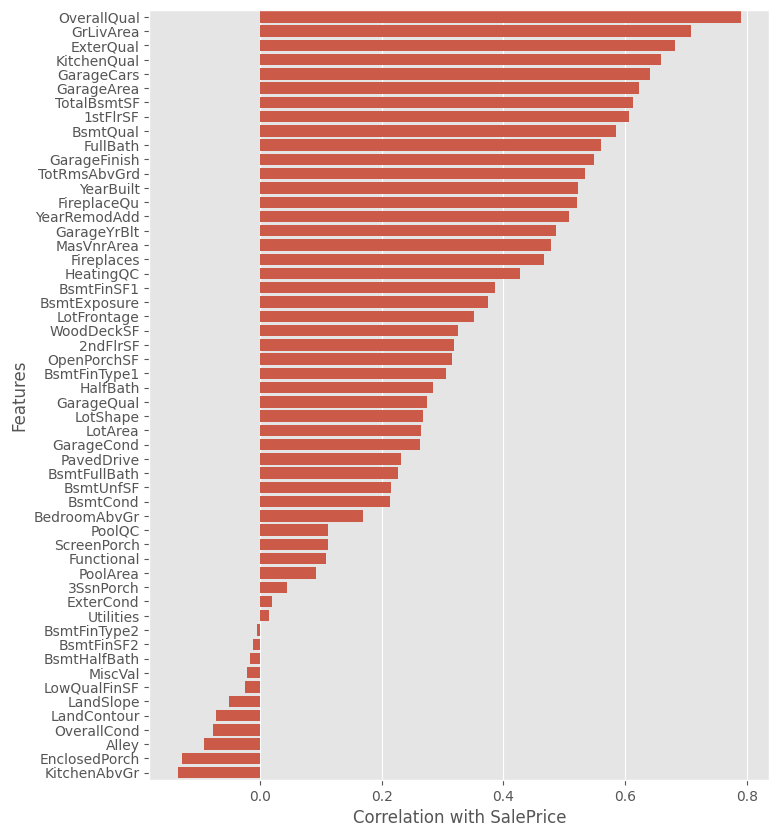

<Figure size 640x480 with 0 Axes>

In [207]:
# Sort correlation values with SalePrice in descending order and plot them
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8, 10))
sns.barplot(x=corr.SalePrice[1:], y=corr.index[1:], orient='h')
plt.xlabel('Correlation with SalePrice')
plt.ylabel('Features')
plt.show()
plt.savefig('CorrSale.png', bbox_inches='tight', dpi=300)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
<ipython-input-208-eb49c7a3e5a2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


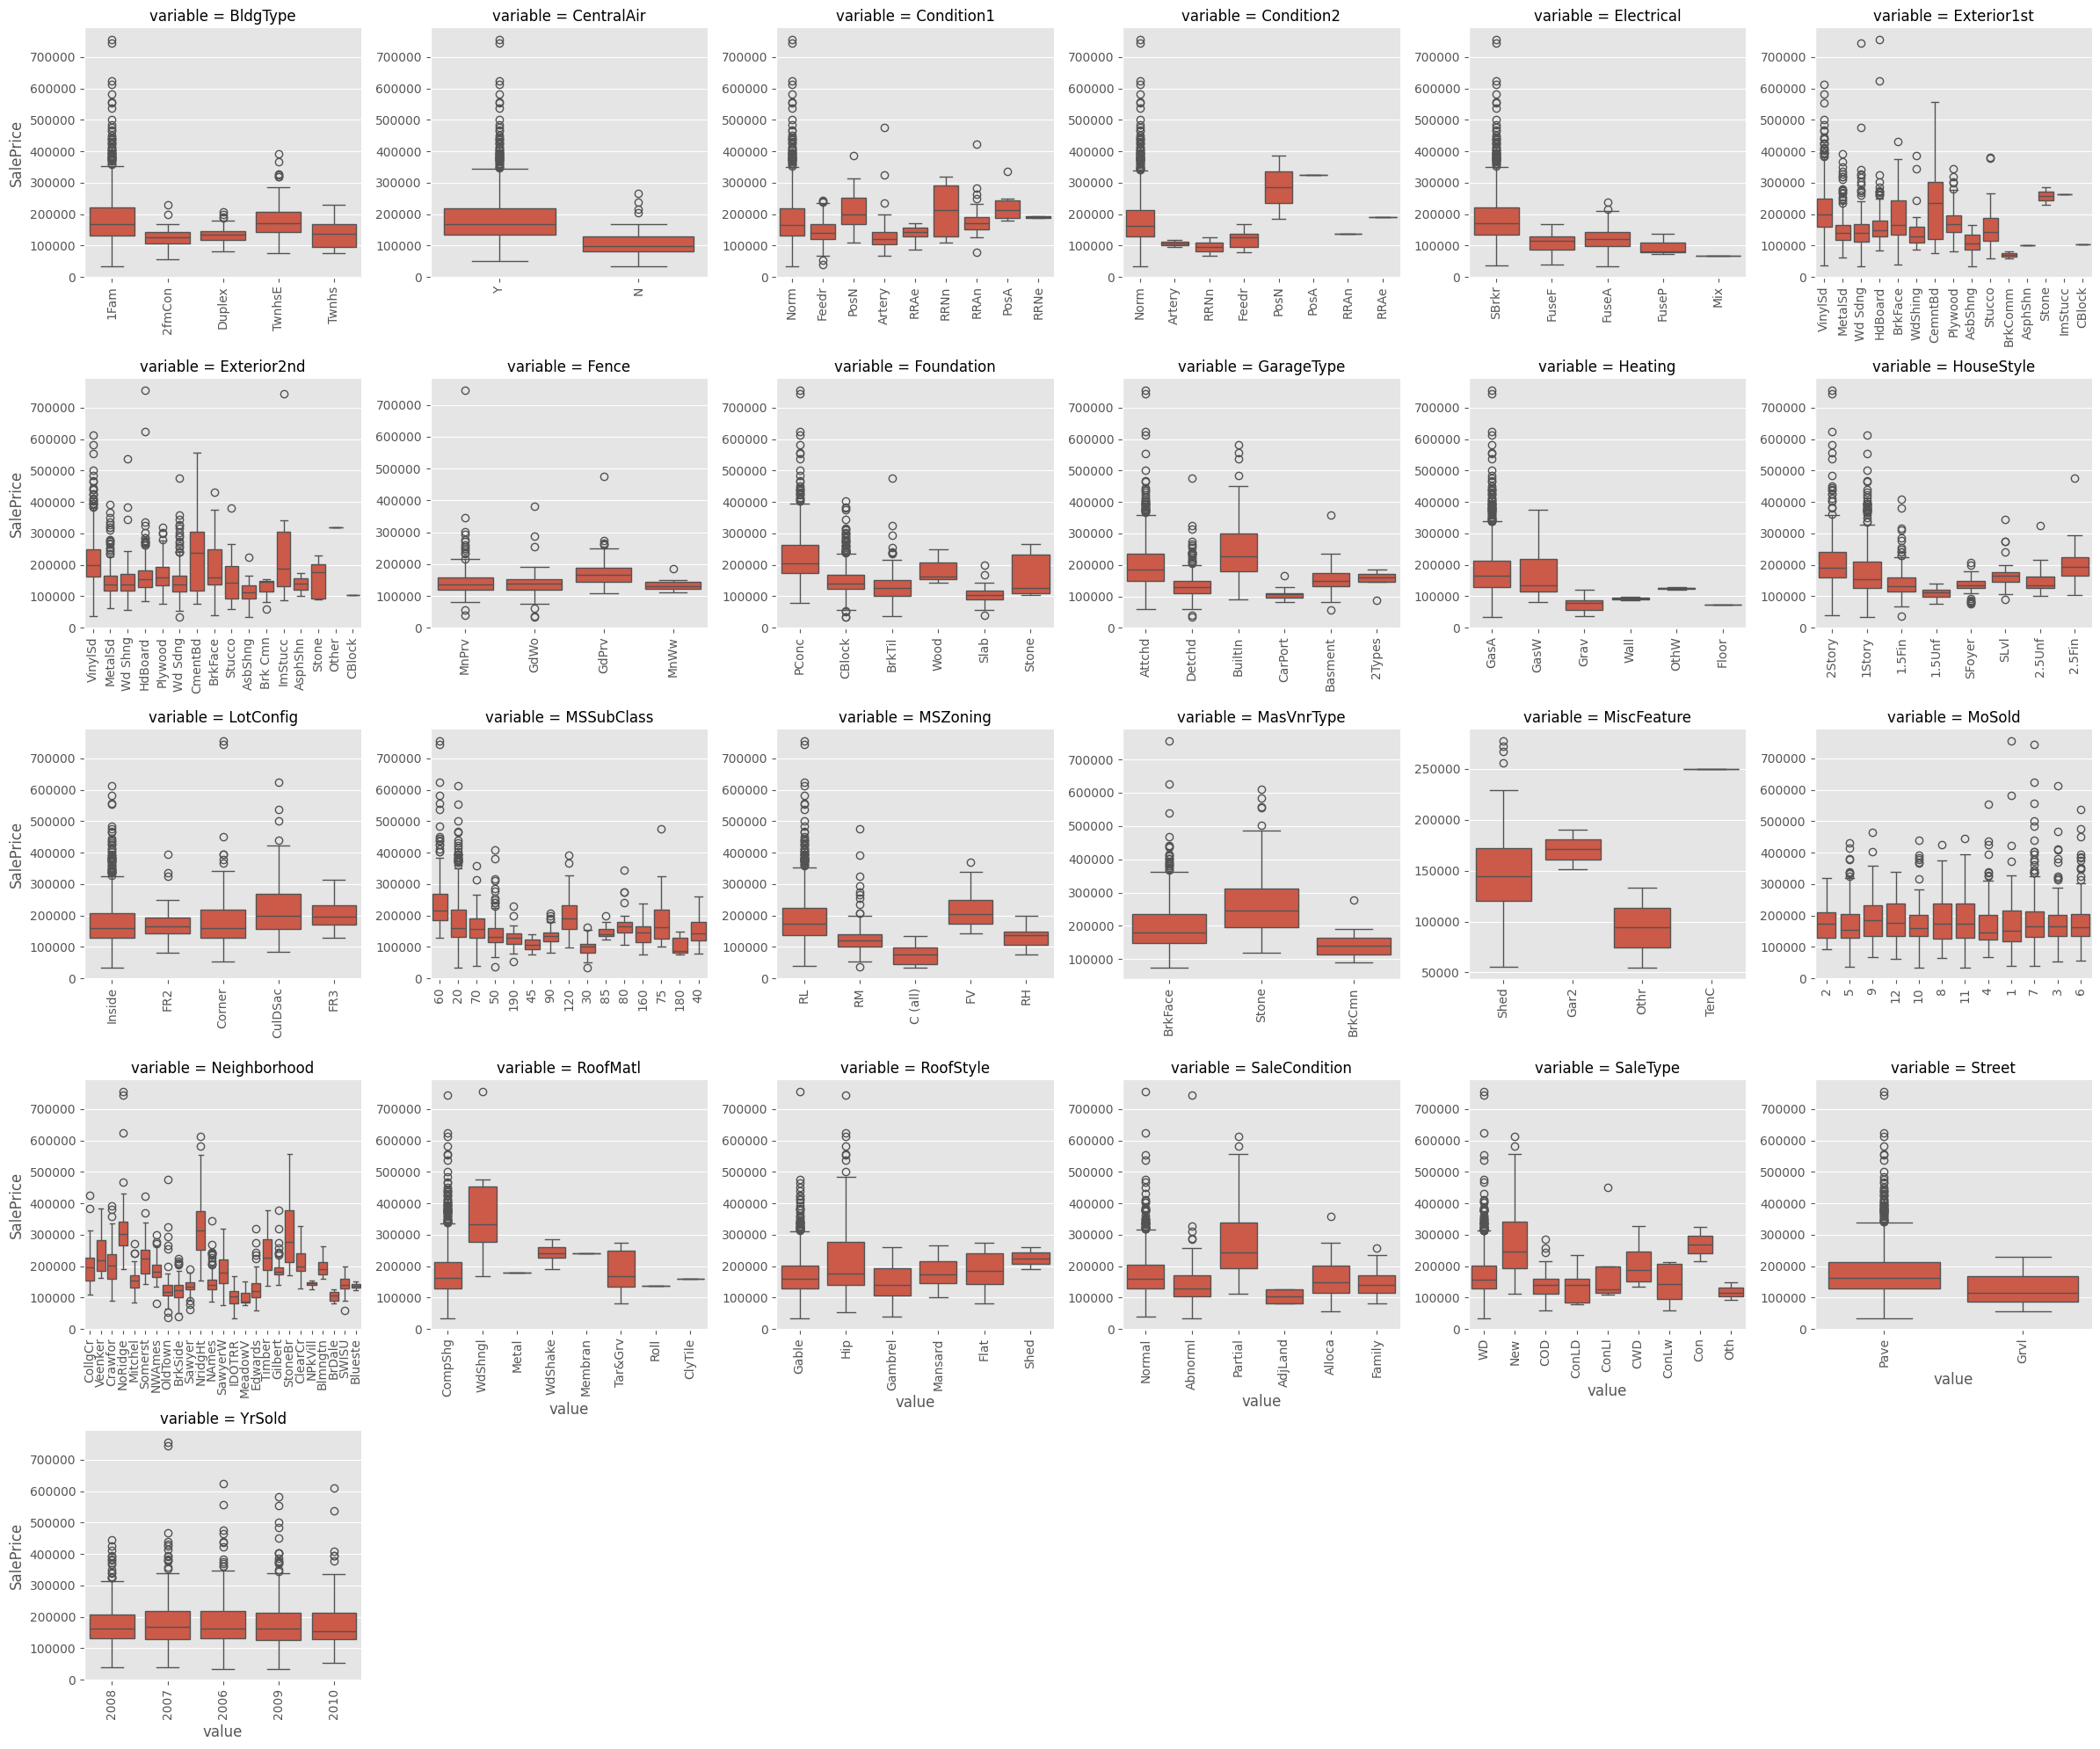

<Figure size 640x480 with 0 Axes>

In [208]:
# Create box plots of categorical features against SalePrice
f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=6, sharex=False, sharey=False, height=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
g.fig.tight_layout()
plt.show()
plt.savefig('CatFeatureSalePrice.png', bbox_inches='tight', dpi=300)

## **Handling Missing Values**

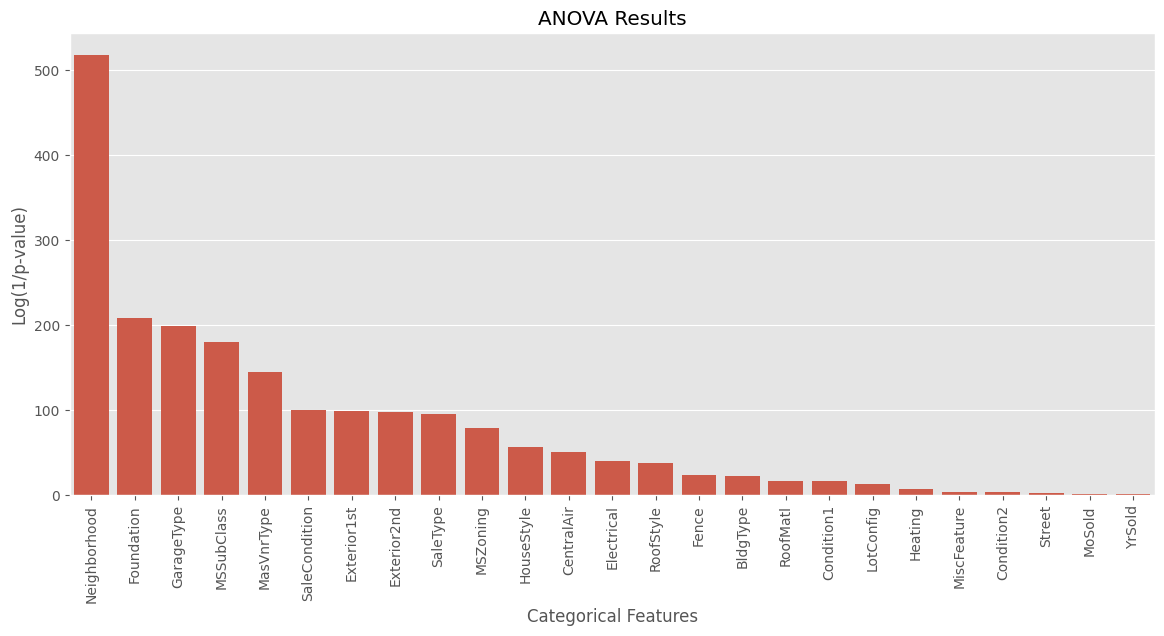

<Figure size 640x480 with 0 Axes>

In [209]:
# Fill missing values in categorical features with 'Missing'
train[cat_features] = train[cat_features].fillna('Missing')

# Perform ANOVA and store the results
anova_results = {'feature': [], 'f': [], 'p': []}
for cat in cat_features:
    group_prices = []
    for group in train[cat].unique():
        group_prices.append(train[train[cat] == group]['SalePrice'].values)
    f_statistic, p_value = scipy.stats.f_oneway(*group_prices)
    anova_results['feature'].append(cat)
    anova_results['f'].append(f_statistic)
    anova_results['p'].append(p_value)
anova_df = pd.DataFrame(anova_results)
anova_df = anova_df[['feature', 'f', 'p']]
anova_df.sort_values('p', inplace=True)

# Plot the results
plt.figure(figsize=(14, 6))
sns.barplot(x=anova_df.feature, y=np.log(1./anova_df['p']))
plt.xticks(rotation=90)
plt.ylabel('Log(1/p-value)')
plt.xlabel('Categorical Features')
plt.title('ANOVA Results')
plt.show()
plt.savefig('ANOVAMissingValues.png', bbox_inches='tight', dpi=300)

In [210]:
# Check for duplicate IDs in the train and test sets
print('Train set duplicate IDs: {}'.format(train.duplicated('Id').sum()))
print('Test set duplicate IDs: {}'.format(test.duplicated('Id').sum()))


Train set duplicate IDs: 0
Test set duplicate IDs: 0


In [211]:
# Count categorical features with "Missing" values
missing_values = (train[cat_features] == 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]


MiscFeature    1406
Fence          1179
MasVnrType      872
GarageType       81
Electrical        1
dtype: int64

In [212]:
# Set the missing Electrical value to the most common type
train.loc[train.Electrical == 'Missing', 'Electrical'] = train.Electrical.mode()[0]


In [213]:
# Check the value counts for MasVnrType
train.MasVnrType.value_counts()


MasVnrType
Missing    872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [214]:
# Replace "Missing" with "None" in MasVnrType
train.MasVnrType.replace({'Missing':'None'}, inplace=True)


In [215]:
# Adjust data discrepancies in MasVnrType and MasVnrArea
train.loc[(train.MasVnrType == 'None') & (train.MasVnrArea > 0), 'MasVnrType'] = 'BrkFace'  # Set to most common type
train.loc[(train.MasVnrType == 'None') & (train.MasVnrArea == 1), 'MasVnrArea'] = 0  # Set 1 sq ft to 0
for vnr_type in train.MasVnrType.unique():
    # Set MasVnrArea to the mean for each veneer type where MasVnrArea is 0
    train.loc[(train.MasVnrType == vnr_type) & (train.MasVnrArea == 0), 'MasVnrArea'] = \
        train[train.MasVnrType == vnr_type].MasVnrArea.mean()


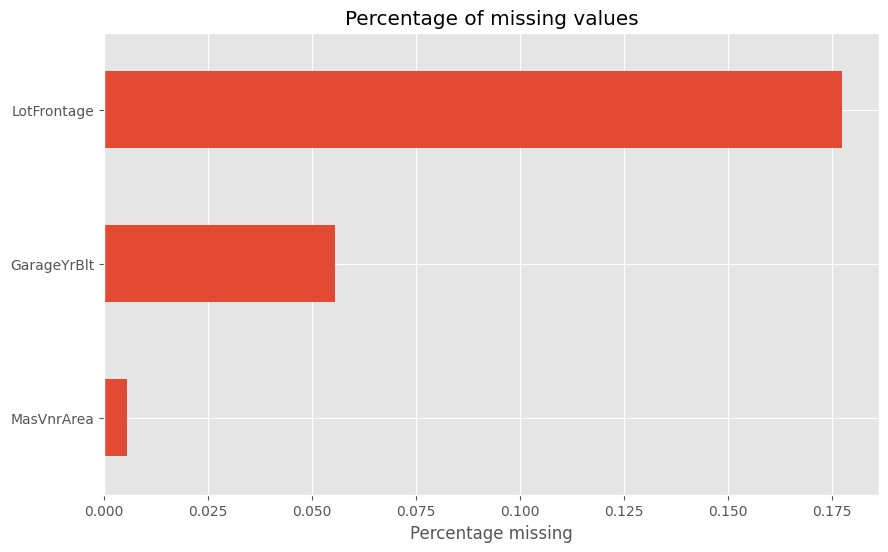

<Figure size 640x480 with 0 Axes>

In [216]:
# Calculate the percentage of missing values and plot them
missing_data = train.isnull().sum() / train.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.xlabel('Percentage missing')
plt.show()
plt.savefig('Percentage_MissingVal.png', bbox_inches='tight', dpi=300)

In [217]:
# Fill missing values in LotFrontage with the median LotFrontage of the corresponding neighborhood
train.LotFrontage = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [218]:
# Fill missing values in MasVnrArea with 0
train.MasVnrArea.fillna(0, inplace=True)

In [219]:
# Fill missing values in GarageYrBlt with 0, indicating no garage
train.GarageYrBlt.fillna(0, inplace=True)

In [220]:
# Checking any remaining missing values
train.isnull().sum().sum()

0

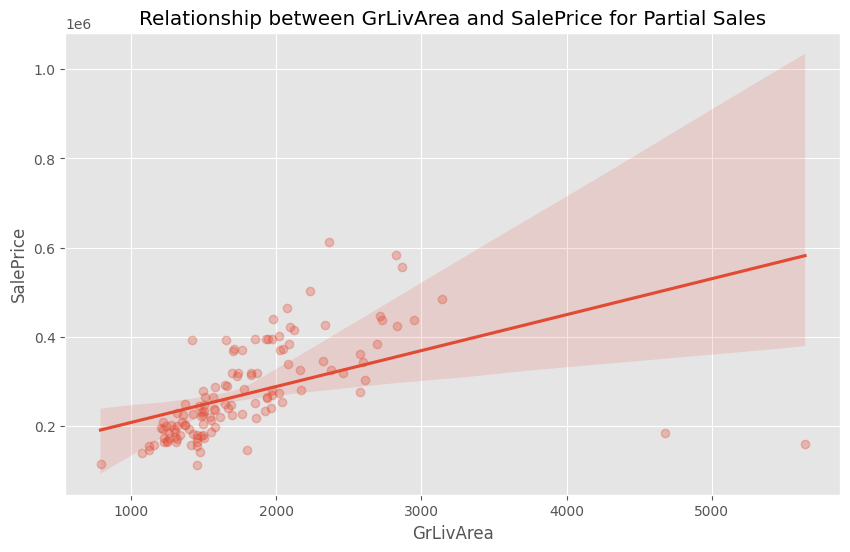

<Figure size 640x480 with 0 Axes>

In [221]:
# Scatter plot of GrLivArea against SalePrice for properties with SaleCondition == 'Partial'
plt.figure(figsize=(10, 6))
sns.regplot(x=train[train.SaleCondition == 'Partial'].GrLivArea,
            y=train[train.SaleCondition == 'Partial'].SalePrice, scatter_kws={'alpha':0.3})
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Relationship between GrLivArea and SalePrice for Partial Sales')
plt.show()
plt.savefig('GrLivAreaSale.png', bbox_inches='tight', dpi=300)

In [222]:
# Remove rows with GrLivArea greater than or equal to 4000 sq ft
train.drop(train[train.GrLivArea >= 4000].index, inplace=True)


In [223]:
# Add additional features

# Total Square Footage
train['TotalSF'] = train.TotalBsmtSF + train.GrLivArea
train['TotalFloorSF'] = train['1stFlrSF'] + train['2ndFlrSF']
train['TotalPorchSF'] = train.OpenPorchSF + train.EnclosedPorch + \
    train['3SsnPorch'] + train.ScreenPorch

# Total Bathrooms
train['TotalBathrooms'] = train.FullBath + .5 * train.HalfBath + \
    train.BsmtFullBath + .5 * train.BsmtHalfBath

# Booleans
train['HasBasement'] = train.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
train['HasGarage'] = train.GarageArea.apply(lambda x: 1 if x > 0 else 0)
train['HasPorch'] = train.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
train['HasPool'] = train.PoolArea.apply(lambda x: 1 if x > 0 else 0)
train['WasRemodeled'] = (train.YearRemodAdd != train.YearBuilt).astype(np.int64)
train['IsNew'] = (train.YearBuilt > 2000).astype(np.int64)
train['WasCompleted'] = (train.SaleCondition != 'Partial').astype(np.int64)

boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool',
                    'WasRemodeled', 'IsNew', 'WasCompleted']

In [224]:
# Get numerical and categorical features, excluding boolean features
num_features, cat_features = get_feature_groups(train)
num_features = [f for f in num_features if f not in boolean_features]

In [225]:
# Log transform numerical features with skew greater than 0.5
features = num_features + ['SalePrice']
for f in features:
    if train[f].skew() > 0.5:
        train[f] = np.log1p(train[f])

In [226]:
# Extract the target variable and drop unnecessary columns
y = train['SalePrice']
train.drop(['SalePrice', 'Id'], axis=1, inplace=True)

In [227]:
# One-hot encode categorical features
model_data = pd.get_dummies(train).copy()

## **Data Splitting and Standardization:**

In [228]:
from sklearn.model_selection import train_test_split

# Split data into train and validation sets
X_train, X_test, y_train, y_test = \
    train_test_split(model_data.copy(), y, test_size=0.3, random_state=42)

# Print shapes of train and validation sets
print('Shapes')
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_test.shape)


Shapes
X_train: (1019, 263)
X_val: (437, 263)
y_train: (1019,)
y_val: (437,)


In [229]:
from sklearn.preprocessing import RobustScaler, StandardScaler

# Standardize numerical features using StandardScaler
stdsc = StandardScaler()
X_train.loc[:, num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:, num_features] = stdsc.transform(X_test[num_features])


In [230]:
from sklearn.model_selection import cross_val_score

def rmse(model, X, y):
    # Calculate root mean squared error using cross-validation
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)


# **Model Training and Evaluation:**
This is the core section where I trained the models on the prepared data and evaluated their performance. It includes splitting the data into training and testing sets, tuning hyperparameters, fitting the models to the training data, and assessing their performance using evaluation metrics such as RSME and R-squared

## Ridge Model

Ridge -> Train R-squared: 0.94207 | Test R-squared: 0.90885
Ridge -> Train RMSE: 0.09624 | Test RMSE: 0.11628 | alpha: 21.25000


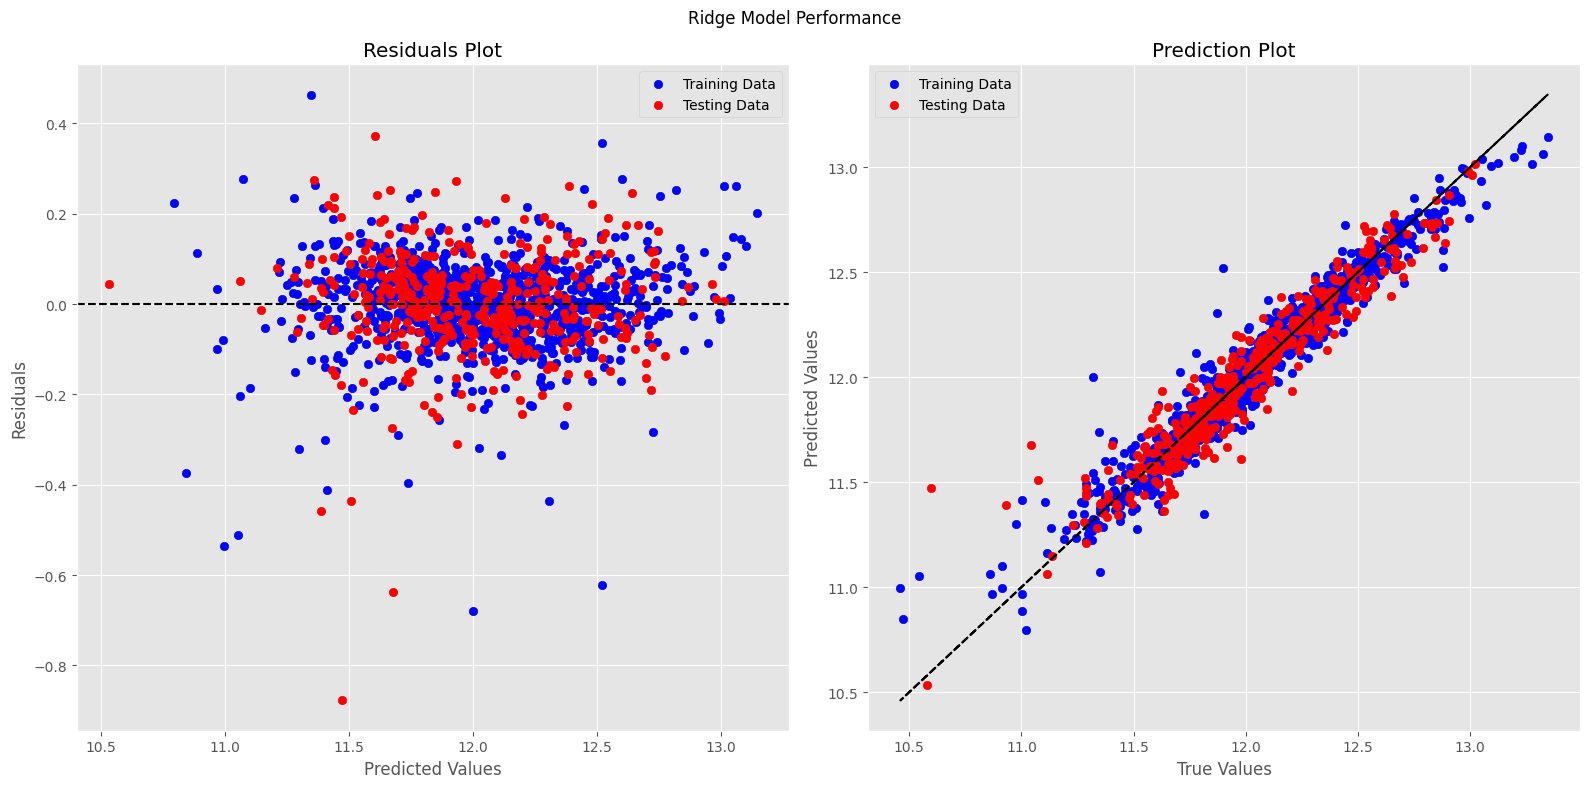

In [231]:
# Define the RMSE function
def rmse(model, X, y):
    return np.sqrt(mean_squared_error(y, model.predict(X)))

# Define model evaluation plots function
def model_evaluation_plots(model, X_train, y_train, X_test, y_test):
    # Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Residuals
    train_residuals = y_train - train_predictions
    test_residuals = y_test - test_predictions

    # Scatter plot for training data
    plt.figure(figsize=(16, 8))
    plt.suptitle('Ridge Model Performance')

    # Plot for residuals
    plt.subplot(1, 2, 1)
    plt.scatter(train_predictions, train_residuals, color='blue', label='Training Data')
    plt.scatter(test_predictions, test_residuals, color='red', label='Testing Data')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Residuals Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid(True)

    # Plot for predictions
    plt.subplot(1, 2, 2)
    plt.scatter(y_train, train_predictions, color='blue', label='Training Data')
    plt.scatter(y_test, test_predictions, color='red', label='Testing Data')
    plt.plot(y_train, y_train, color='black', linestyle='--')
    plt.title('Prediction Plot')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Use GridSearchCV to find the optimal alpha value for Ridge regression
param_grid = {'alpha': [0.01, 0.1, 1., 5., 10., 25., 50., 100.]}
ridge = GridSearchCV(Ridge(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)
alpha = ridge.best_params_['alpha']

# Refine the search around the optimal alpha value
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)]}
ridge = GridSearchCV(Ridge(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)
alpha = ridge.best_params_['alpha']
ridge = ridge.best_estimator_

# Calculate RMSE
train_rmse_ridge = rmse(ridge, X_train, y_train)
test_rmse_ridge = rmse(ridge, X_test, y_test)

# Calculate R-squared
train_r2_ridge = r2_score(y_train, ridge.predict(X_train))
test_r2_ridge = r2_score(y_test, ridge.predict(X_test))

print('Ridge -> Train R-squared: {:.5f} | Test R-squared: {:.5f}'.format(train_r2_ridge, test_r2_ridge))
print('Ridge -> Train RMSE: {:.5f} | Test RMSE: {:.5f} | alpha: {:.5f}'.format(train_rmse_ridge, test_rmse_ridge, alpha))

# Model evaluation plots
model_evaluation_plots(ridge, X_train, y_train, X_test, y_test)


## Lasso Model

Lasso -> Train RMSE: 0.09692 | Test RMSE: 0.11432 | alpha: 0.00055
Lasso -> Train R-squared: 0.94126 | Test R-squared: 0.91190


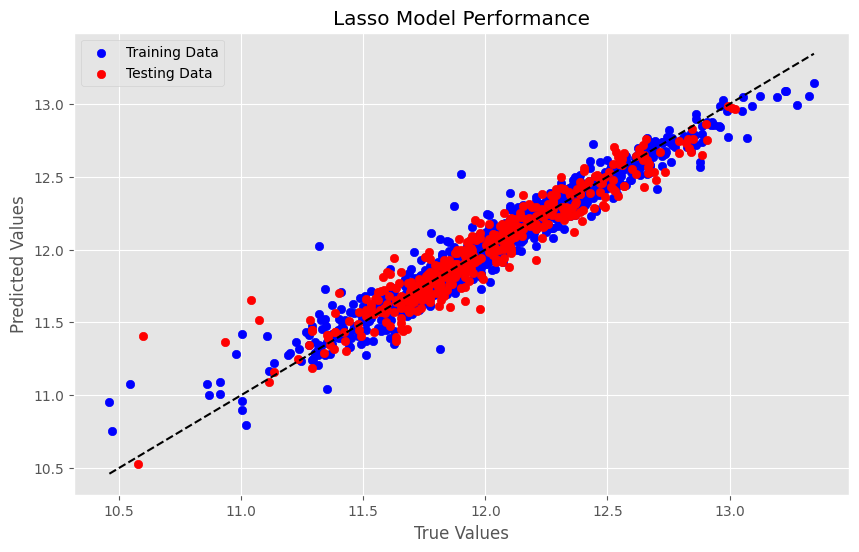

In [232]:
# Define the RMSE function
def rmse(model, X, y):
    return mean_squared_error(y, model.predict(X), squared=False)

def model_evaluation_plots(model, X_train, y_train, X_test, y_test):
    # Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Scatter plot for training data
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, train_predictions, color='blue', label='Training Data')
    # Scatter plot for testing data
    plt.scatter(y_test, test_predictions, color='red', label='Testing Data')

    # Diagonal line
    plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
             [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
             color='black', linestyle='--')

    plt.title('Lasso Model Performance')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Grid Search for Initial Alpha Value
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

# Refinement of Alpha Value
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

# Evaluate the model
train_rmse_lasso = rmse(lasso, X_train, y_train)
test_rmse_lasso = rmse(lasso, X_test, y_test)

print('Lasso -> Train RMSE: {:.5f} | Test RMSE: {:.5f} | alpha: {:.5f}'.format(
    train_rmse_lasso, test_rmse_lasso, alpha))

# Predictions
train_predictions = lasso.predict(X_train)
test_predictions = lasso.predict(X_test)

# Calculate R-squared
train_r2_lasso = r2_score(y_train, train_predictions)
test_r2_lasso = r2_score(y_test, test_predictions)

print('Lasso -> Train R-squared: {:.5f} | Test R-squared: {:.5f}'.format(train_r2_lasso, test_r2_lasso))

# Model evaluation plots
model_evaluation_plots(lasso, X_train, y_train, X_test, y_test)



## Support Vector Model

SVR -> Train R-squared: 0.96447 | Test R-squared: 0.87208
SVR -> Train RMSE: 0.07537 | Test RMSE: 0.13776


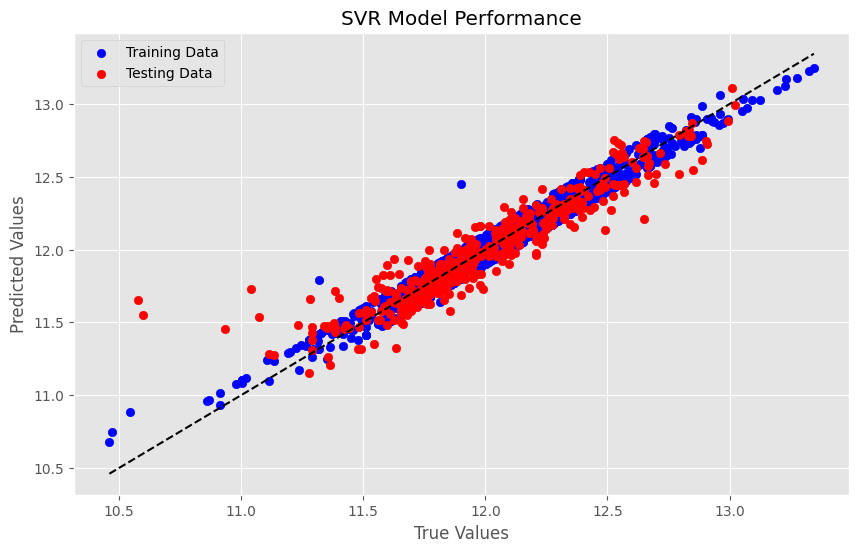

In [233]:
def rmse(model, X, y):
    return np.sqrt(mean_squared_error(y, model.predict(X)))

def model_evaluation_plots(model, X_train, y_train, X_test, y_test):
    # Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Scatter plot for training data
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, train_predictions, color='blue', label='Training Data')
    # Scatter plot for testing data
    plt.scatter(y_test, test_predictions, color='red', label='Testing Data')

    # Diagonal line
    plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
             [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
             color='black', linestyle='--')

    plt.title('SVR Model Performance')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Initialize SVR
svr = SVR()

# Fit SVR
svr.fit(X_train, y_train)

# Predictions
train_predictions = svr.predict(X_train)
test_predictions = svr.predict(X_test)

# Calculate R-squared
train_r2_svr = r2_score(y_train, train_predictions)
test_r2_svr = r2_score(y_test, test_predictions)

# Calculate RMSE
train_rmse_svr = rmse(svr, X_train, y_train)
test_rmse_svr = rmse(svr, X_test, y_test)

print('SVR -> Train R-squared: {:.5f} | Test R-squared: {:.5f}'.format(train_r2_svr, test_r2_svr))
print('SVR -> Train RMSE: {:.5f} | Test RMSE: {:.5f}'.format(train_rmse_svr, test_rmse_svr))

# Model evaluation plots
model_evaluation_plots(svr, X_train, y_train, X_test, y_test)


## Random Forest Model

Random Forest -> Train R-squared: 0.98359 | Test R-squared: 0.87314
Random Forest -> Train RMSE: 0.05123 | Test RMSE: 0.13719


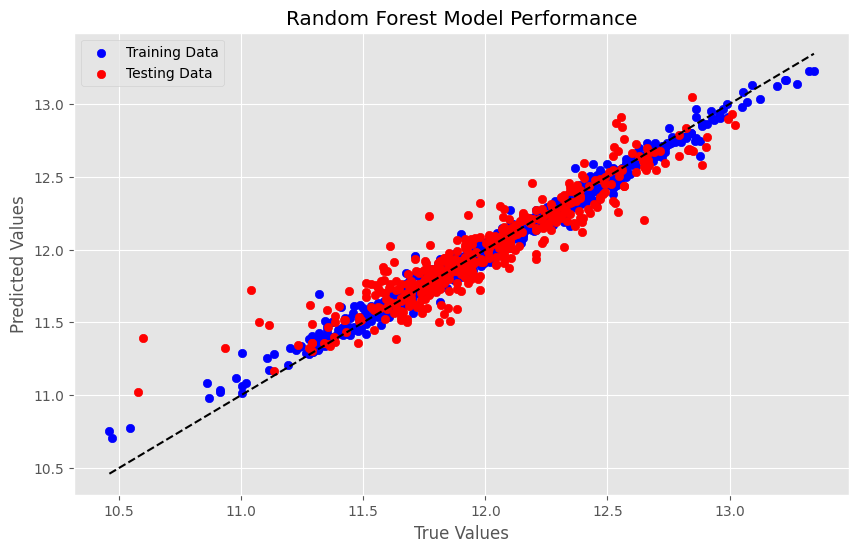

In [234]:
# Define the RMSE function
def rmse(model, X, y):
    return np.sqrt(mean_squared_error(y, model.predict(X)))

# Define model evaluation plots function
def model_evaluation_plots(model, X_train, y_train, X_test, y_test):
    # Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Scatter plot for training data
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, train_predictions, color='blue', label='Training Data')
    # Scatter plot for testing data
    plt.scatter(y_test, test_predictions, color='red', label='Testing Data')

    # Diagonal line
    plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
             [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
             color='black', linestyle='--')

    plt.title('Random Forest Model Performance')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Initialize Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Random Forest Regression
rf.fit(X_train, y_train)

# Predictions
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

# Calculate RMSE
train_rmse_rf = rmse(rf, X_train, y_train)
test_rmse_rf = rmse(rf, X_test, y_test)

# Calculate R-squared
train_r2_rf = r2_score(y_train, train_predictions)
test_r2_rf = r2_score(y_test, test_predictions)

print('Random Forest -> Train R-squared: {:.5f} | Test R-squared: {:.5f}'.format(train_r2_rf, test_r2_rf))
print('Random Forest -> Train RMSE: {:.5f} | Test RMSE: {:.5f}'.format(train_rmse_rf, test_rmse_rf))

# Model evaluation plots
model_evaluation_plots(rf, X_train, y_train, X_test, y_test)


# **Model's Output Comparisons**

Here, I have compared the output accuaries of the models using Bar Graph.

## Comparsion of R2

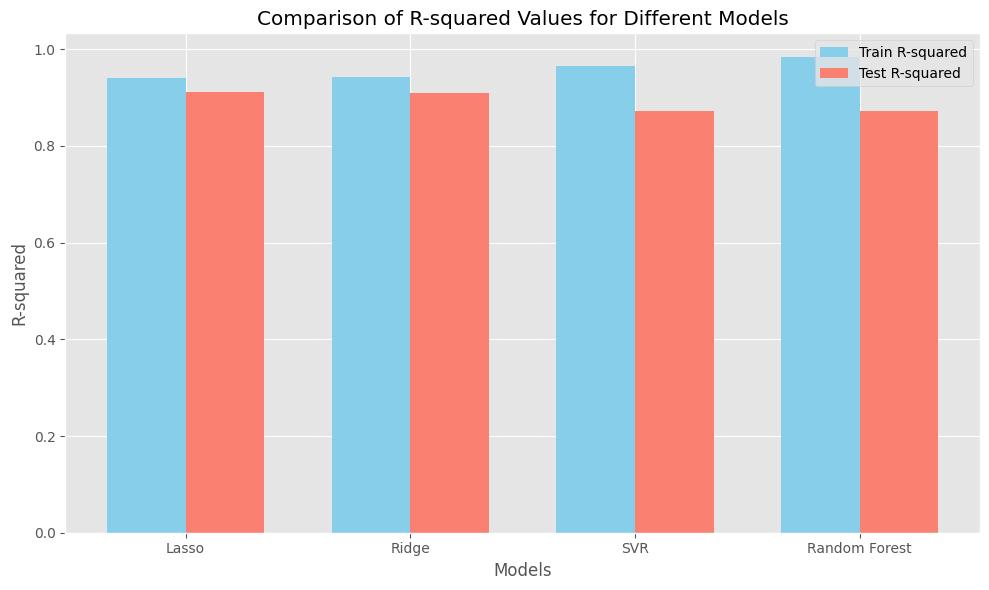

<Figure size 640x480 with 0 Axes>

In [235]:
# Provided R-squared values for each model
train_r2_values = [train_r2_lasso, train_r2_ridge, train_r2_svr, train_r2_rf]
test_r2_values = [test_r2_lasso, test_r2_ridge, test_r2_svr, test_r2_rf]
model_names = ['Lasso', 'Ridge', 'SVR', 'Random Forest']

# Plot R-squared values on a bar graph
bar_width = 0.35
index = np.arange(len(model_names))

plt.figure(figsize=(10, 6))
plt.bar(index, train_r2_values, bar_width, label='Train R-squared', color='skyblue')
plt.bar(index + bar_width, test_r2_values, bar_width, label='Test R-squared', color='salmon')

plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Values for Different Models')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('ComparisonR2.png', bbox_inches='tight', dpi=300)

## Comparsion of RMSE

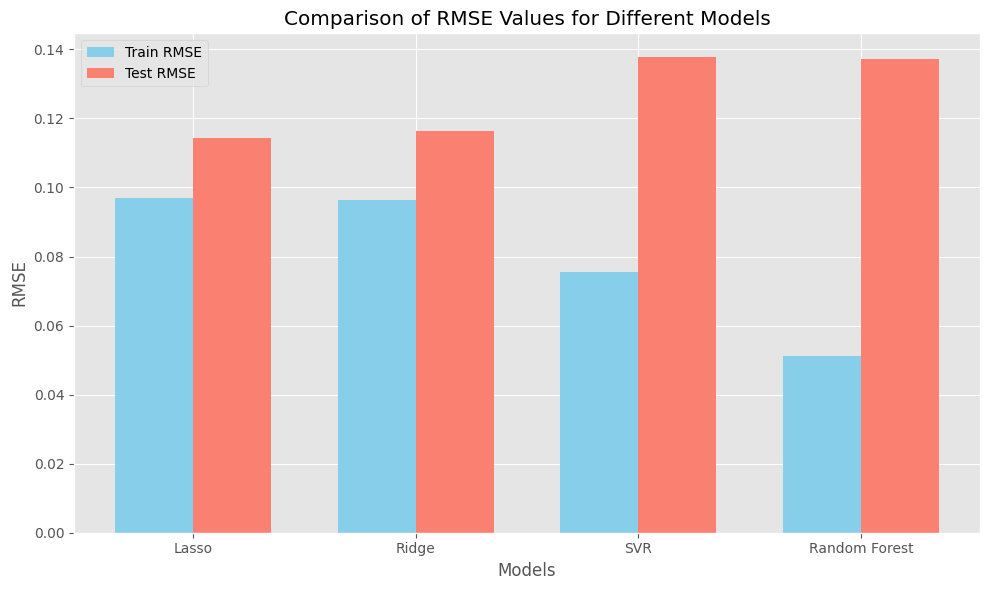

In [236]:
# Provided RMSE values for each model
train_rmse_values = [train_rmse_lasso, train_rmse_ridge, train_rmse_svr, train_rmse_rf]
test_rmse_values = [test_rmse_lasso, test_rmse_ridge, test_rmse_svr, test_rmse_rf]
model_names = ['Lasso', 'Ridge', 'SVR', 'Random Forest']

# Plot RMSE values on a bar graph
bar_width = 0.35
index = np.arange(len(model_names))

plt.figure(figsize=(10, 6))
plt.bar(index, train_rmse_values, bar_width, label='Train RMSE', color='skyblue')
plt.bar(index + bar_width, test_rmse_values, bar_width, label='Test RMSE', color='salmon')

plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Values for Different Models')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()
plt.tight_layout()
plt.savefig('ComparisonRMSE.png', bbox_inches='tight', dpi=300)
plt.show()